# Deep learning via TenserFlow

## 1. TensorFlow and Keras
- Loading TensorFlow
- Loading images

In [12]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [13]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import load_img

In [14]:
# install it via git clone 
dataset = "https://github.com/alexeygrigorev/clothing-dataset-small.git"

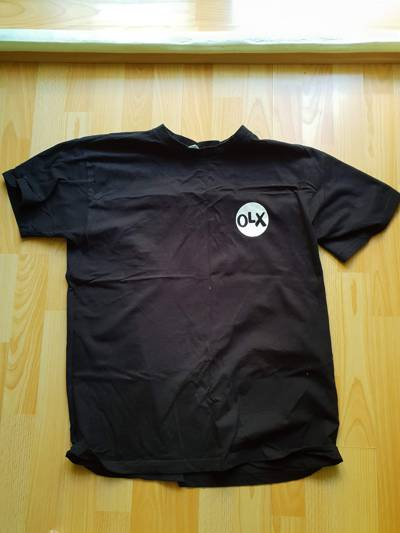

In [15]:
path = "clothing-dataset-small/train/t-shirt"
name = "5f0a3fa0-6a3d-4b68-b213-72766a643de7.jpg"
fullname = f"{path}/{name}"
load_img(fullname)

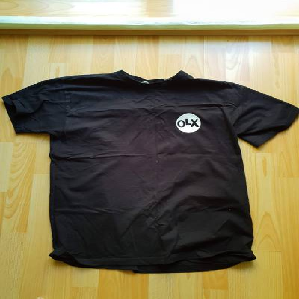

In [16]:
img = load_img(fullname, target_size=(299, 299, 3))
img

In [17]:
print(img)

<PIL.Image.Image image mode=RGB size=299x299 at 0x70B90DDC8950>


In [18]:
x = np.array(img)
x.shape

(299, 299, 3)

## 2. Pretrained CNN
- Pre-trained models - https://keras.io/api/applications/
- imagenet dataset - https://www.image-net.org/

In [19]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions

In [20]:
model = Xception(weights="imagenet", input_shape=(299, 299, 3))

In [21]:
X = np.array([x])
X.shape

(1, 299, 299, 3)

In [22]:
X = preprocess_input(X)

In [23]:
pred = model.predict(X)

2025-12-09 04:59:27.598921: I external/local_xla/xla/service/service.cc:163] XLA service 0x70b7fc002c00 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-12-09 04:59:27.598949: I external/local_xla/xla/service/service.cc:171]   StreamExecutor device (0): NVIDIA GeForce RTX 4060 Laptop GPU, Compute Capability 8.9
2025-12-09 04:59:27.637584: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-12-09 04:59:27.917593: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:473] Loaded cuDNN version 91700
2025-12-09 04:59:31.527667: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-12-09 04:59:31.675640: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel 

1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step


In [24]:
pred.shape

(1, 1000)

In [25]:
decode_predictions(pred)

[[('n03595614', 'jersey', np.float32(0.68295157)),
  ('n02916936', 'bulletproof_vest', np.float32(0.037781093)),
  ('n04370456', 'sweatshirt', np.float32(0.034392726)),
  ('n03710637', 'maillot', np.float32(0.011353114)),
  ('n04525038', 'velvet', np.float32(0.0018484121))]]

## 3. CNN (Convolutional neural network)
- types of layers: Convolutional and dense
- Convolutional layers and filters
- Dense layers

For more info refer to this course - https://cs231n.github.io/

## 4. Transfer learning 
 - Reading data with `ImageDataGenerator`
 - Train `Xception` on smaller images(150x150)

In [26]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [27]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [28]:
train_ds = train_gen.flow_from_directory(
    "./clothing-dataset-small/train", 
    target_size=(150, 150), 
    batch_size=32
    )


Found 3068 images belonging to 10 classes.


In [29]:
train_ds.class_indices

{'dress': 0,
 'hat': 1,
 'longsleeve': 2,
 'outwear': 3,
 'pants': 4,
 'shirt': 5,
 'shoes': 6,
 'shorts': 7,
 'skirt': 8,
 't-shirt': 9}

In [30]:
!ls clothing-dataset-small/train

dress  hat  longsleeve	outwear  pants	shirt  shoes  shorts  skirt  t-shirt


In [31]:
X, y = next(train_ds)
X.shape

(32, 150, 150, 3)

In [32]:
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    "./clothing-dataset-small/validation", 
    target_size=(150, 150), 
    batch_size=32
    )

Found 341 images belonging to 10 classes.


In [33]:
base_model = Xception(
    weights="imagenet",
    include_top=False,
    input_shape=(150, 150, 3)
    )

base_model.trainable = False

In [34]:
inputs = keras.Input(shape=(150, 150, 3))

base = base_model(inputs)

vectors = keras.layers.GlobalAveragePooling2D()(base)

outputs = keras.layers.Dense(10)(vectors)

model = keras.Model(inputs, outputs)

In [35]:
preds = model.predict(X)

2025-12-09 04:59:44.344004: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-12-09 04:59:44.517190: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-12-09 04:59:45.265537: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-12-09 04:59:45.440919: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-12-09 04:59:45.612251: E external/local_xla/xla/stream_

1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step


In [36]:
preds.shape

(32, 10)

In [37]:
learning_rate= 0.01
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

loss = keras.losses.CategoricalCrossentropy(from_logits=True)


In [38]:
model.compile(optimizer=optimizer, loss=loss, metrics=["accuracy"])

In [39]:
history = model.fit(
    train_ds,
    epochs=10,
    validation_data=val_ds
    )

Epoch 1/10
32/96 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.4480 - loss: 1.9874

2025-12-09 04:59:59.597485: E external/local_xla/xla/service/slow_operation_alarm.cc:73] Trying algorithm eng0{} for conv (f32[28,728,18,18]{3,2,1,0}, u8[0]{0}) custom-call(f32[28,728,18,18]{3,2,1,0}, f32[728,1,3,3]{3,2,1,0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, feature_group_count=728, custom_call_target="__cudnn$convForward", backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"activation_mode":"kNone","conv_result_scale":1,"side_input_scale":0,"leakyrelu_alpha":0},"force_earliest_schedule":false,"reification_cost":[]} is taking a while...
2025-12-09 04:59:59.599132: E external/local_xla/xla/service/slow_operation_alarm.cc:140] The operation took 1.093712411s
Trying algorithm eng0{} for conv (f32[28,728,18,18]{3,2,1,0}, u8[0]{0}) custom-call(f32[28,728,18,18]{3,2,1,0}, f32[728,1,3,3]{3,2,1,0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, feature_group_count=728, custom_call_target="__cudnn$convForwa

96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - accuracy: 0.5756 - loss: 1.5215

2025-12-09 05:00:13.224847: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-12-09 05:00:13.399195: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-12-09 05:00:13.573074: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-12-09 05:00:14.167020: E external/local_xla/xla/stream_executor/cuda/cuda_timer.cc:86] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2025-12-09 05:00:14.340199: E external/local_xla/xla/stream_

96/96 ━━━━━━━━━━━━━━━━━━━━ 28s 254ms/step - accuracy: 0.6721 - loss: 1.1908 - val_accuracy: 0.7742 - val_loss: 0.7270
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.8250 - loss: 0.5241 - val_accuracy: 0.7947 - val_loss: 0.8394
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.8719 - loss: 0.3720 - val_accuracy: 0.7859 - val_loss: 0.8367
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.9169 - loss: 0.2532 - val_accuracy: 0.7713 - val_loss: 0.9196
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.9364 - loss: 0.1695 - val_accuracy: 0.7478 - val_loss: 1.0808
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - accuracy: 0.9540 - loss: 0.1296 - val_accuracy: 0.8123 - val_loss: 0.9161
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.9746 - loss: 0.0791 - val_accuracy: 0.8123 - val_loss: 0.8177
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.9860 - loss: 0.0533 - val_accuracy: 0.7977 - val_loss: 

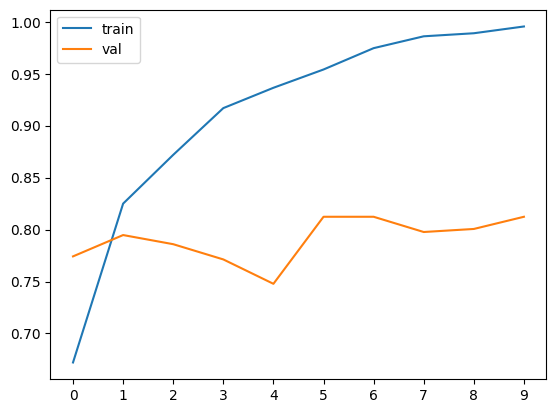

In [40]:
plt.plot(history.history["accuracy"], label="train")
plt.plot(history.history["val_accuracy"], label="val")
plt.xticks(np.arange(10))

plt.legend()

## 5. Adjusting the learning rate 
- What's the learning rate
- trying different values

In [41]:
def make_model(learning_rate= 0.01):
    base_model = Xception(
    weights="imagenet",
    include_top=False,
    input_shape=(150, 150, 3)
    )
    
    base_model.trainable = False

    ##
    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    outputs = keras.layers.Dense(10)(vectors)
    model = keras.Model(inputs, outputs)
    ##

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer, 
        loss=loss,
        metrics=["accuracy"]
        )
    
    return model

In [42]:
scores = {}

for lr in [0.0001, 0.001, 0.01, 0.1]:
    print(lr)
    model = make_model(learning_rate=lr)

    history = model.fit(
        train_ds,
        epochs=10,
        validation_data=val_ds
        )
    
    scores[lr] = history.history

    print()
    print()

0.0001
Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 13s 95ms/step - accuracy: 0.4012 - loss: 1.8465 - val_accuracy: 0.5572 - val_loss: 1.5101
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.5671 - loss: 1.3545 - val_accuracy: 0.6452 - val_loss: 1.1910
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.6506 - loss: 1.1253 - val_accuracy: 0.6950 - val_loss: 1.0217
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.6884 - loss: 0.9893 - val_accuracy: 0.7419 - val_loss: 0.9221
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.7194 - loss: 0.8986 - val_accuracy: 0.7537 - val_loss: 0.8518
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.7389 - loss: 0.8317 - val_accuracy: 0.7742 - val_loss: 0.8032
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.7507 - loss: 0.7800 - val_accuracy: 0.7977 - val_loss: 0.7632
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.7647 - loss: 0.7380 - val_accuracy: 0.

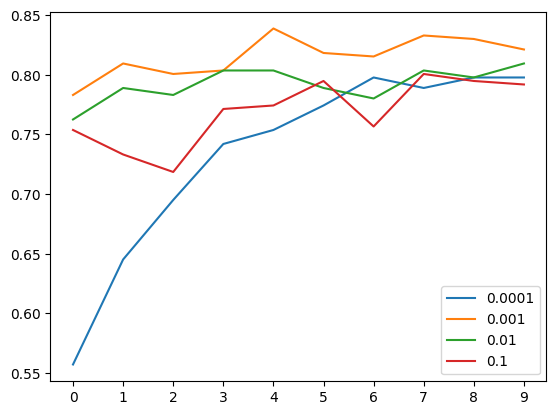

In [43]:
for lr, hist in scores.items():
    plt.plot(hist["val_accuracy"], label=lr)

plt.xticks(np.arange(10))
plt.legend()

In [44]:
# there for our learning rate will be 
learning_rate = 0.001

## 6. Checkpointing
- Saving the best model only 
- Training the model with callbacks 

In [45]:
checkpoint = keras.callbacks.ModelCheckpoint(
    "xception_v1_{epoch:2d}_{val_accuracy:.3f}.h5",
    save_best_only = True,
    monitor="val_accuracy",
    mode="max"
)

In [46]:
learning_rate = 0.001

model = make_model(learning_rate=learning_rate)

history = model.fit(
        train_ds,
        epochs=10,
        validation_data=val_ds,
        callbacks=[checkpoint]
        )

Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.5106 - loss: 1.4798

96/96 ━━━━━━━━━━━━━━━━━━━━ 14s 111ms/step - accuracy: 0.6219 - loss: 1.1220 - val_accuracy: 0.7859 - val_loss: 0.6952
Epoch 2/10
95/96 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.7766 - loss: 0.6715

96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.7823 - loss: 0.6427 - val_accuracy: 0.8123 - val_loss: 0.6099
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.8299 - loss: 0.5165 - val_accuracy: 0.8065 - val_loss: 0.5684
Epoch 4/10
95/96 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8661 - loss: 0.4403

96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.8631 - loss: 0.4338 - val_accuracy: 0.8240 - val_loss: 0.5546
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.8869 - loss: 0.3746 - val_accuracy: 0.8211 - val_loss: 0.5315
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.9006 - loss: 0.3350 - val_accuracy: 0.8152 - val_loss: 0.5293
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.9231 - loss: 0.2907 - val_accuracy: 0.8240 - val_loss: 0.5148
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.9280 - loss: 0.2604 - val_accuracy: 0.8211 - val_loss: 0.5382
Epoch 9/10
95/96 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9403 - loss: 0.2401

96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9404 - loss: 0.2406 - val_accuracy: 0.8416 - val_loss: 0.5140
Epoch 10/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.9505 - loss: 0.2154 - val_accuracy: 0.8299 - val_loss: 0.5110


## 7. Adding more layers
- Adding one inner dense layer
- Experimenting with different sizes on inner layer

In [47]:
# Function to define model by adding new dense layer
def make_model(learning_rate=0.01, size_inner=100): # default layer size is 100
    base_model = Xception(weights='imagenet',
                          include_top=False,
                          input_shape=(150,150,3))

    base_model.trainable = False
    
    #########################################
    
    inputs = keras.Input(shape=(150,150,3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors) # activation function 'relu'
    outputs = keras.layers.Dense(10)(inner)
    model = keras.Model(inputs, outputs)
    
    #########################################
    
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    # Compile the model
    model.compile(optimizer=optimizer,
                  loss=loss,
                  metrics=['accuracy'])
    
    return model

In [48]:
# Experiement different number of inner layer with best learning rate
# Note: We should've added the checkpoint for training but for simplicity we are skipping it
learning_rate = 0.001

scores = {}

# List of inner layer sizes
sizes = [10, 100, 1000]

for size in sizes:
    print(size)
    
    model = make_model(learning_rate=learning_rate, size_inner=size)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[size] = history.history
    
    print()
    print()

10
Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 15s 99ms/step - accuracy: 0.5645 - loss: 1.3560 - val_accuracy: 0.6891 - val_loss: 0.9979
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.7405 - loss: 0.8155 - val_accuracy: 0.7713 - val_loss: 0.7474
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.8057 - loss: 0.6152 - val_accuracy: 0.8006 - val_loss: 0.6406
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.8455 - loss: 0.5016 - val_accuracy: 0.7947 - val_loss: 0.6371
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.8628 - loss: 0.4277 - val_accuracy: 0.8035 - val_loss: 0.5926
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.8924 - loss: 0.3626 - val_accuracy: 0.8152 - val_loss: 0.5616
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.9120 - loss: 0.3111 - val_accuracy: 0.8094 - val_loss: 0.5424
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.9250 - loss: 0.2789 - val_accuracy: 0.8065

2025-12-09 05:05:11.586112: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-12-09 05:05:12.191051: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_4237', 68 bytes spill stores, 68 bytes spill loads



96/96 ━━━━━━━━━━━━━━━━━━━━ 15s 105ms/step - accuracy: 0.6802 - loss: 0.9563 - val_accuracy: 0.7537 - val_loss: 0.6844
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.8204 - loss: 0.5173 - val_accuracy: 0.8123 - val_loss: 0.5853
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.8866 - loss: 0.3439 - val_accuracy: 0.8035 - val_loss: 0.5917
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - accuracy: 0.9263 - loss: 0.2467 - val_accuracy: 0.8123 - val_loss: 0.5630
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.9521 - loss: 0.1746 - val_accuracy: 0.7977 - val_loss: 0.6242
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9749 - loss: 0.1204 - val_accuracy: 0.8123 - val_loss: 0.5937
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.9886 - loss: 0.0813 - val_accuracy: 0.8240 - val_loss: 0.6132
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.9954 - loss: 0.0577 - val_accuracy: 0.8152 - val_loss: 

2025-12-09 05:05:56.157267: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-12-09 05:05:56.778491: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_3793', 24 bytes spill stores, 24 bytes spill loads

2025-12-09 05:05:57.043477: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_4237', 68 bytes spill stores, 68 bytes spill loads



63/96 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5973 - loss: 1.2611

2025-12-09 05:06:01.524720: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_3800', 8 bytes spill stores, 8 bytes spill loads

2025-12-09 05:06:01.709845: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_3800', 4 bytes spill stores, 4 bytes spill loads

2025-12-09 05:06:01.747929: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_3793', 48 bytes spill stores, 48 bytes spill loads

2025-12-09 05:06:01.811735: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_3800', 68 bytes spill stores, 68 bytes spill loads

2025-12-09 05:06:01.817654: I external/local

96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.6272 - loss: 1.1552

2025-12-09 05:06:09.368639: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1093', 8 bytes spill stores, 8 bytes spill loads

2025-12-09 05:06:09.404379: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1093', 4 bytes spill stores, 4 bytes spill loads

2025-12-09 05:06:09.528785: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1086', 48 bytes spill stores, 48 bytes spill loads

2025-12-09 05:06:09.611830: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1093', 68 bytes spill stores, 68 bytes spill loads

2025-12-09 05:06:09.634919: I external/local

96/96 ━━━━━━━━━━━━━━━━━━━━ 17s 129ms/step - accuracy: 0.6939 - loss: 0.9118 - val_accuracy: 0.7947 - val_loss: 0.5734
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.8527 - loss: 0.4276 - val_accuracy: 0.7801 - val_loss: 0.6629
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.9130 - loss: 0.2603 - val_accuracy: 0.8006 - val_loss: 0.6278
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.9557 - loss: 0.1543 - val_accuracy: 0.8416 - val_loss: 0.5615
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.9788 - loss: 0.0784 - val_accuracy: 0.8182 - val_loss: 0.6355
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.9870 - loss: 0.0573 - val_accuracy: 0.8123 - val_loss: 0.6335
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.9915 - loss: 0.0417 - val_accuracy: 0.8182 - val_loss: 0.6494
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.9954 - loss: 0.0192 - val_accuracy: 0.8094 - val_loss: 

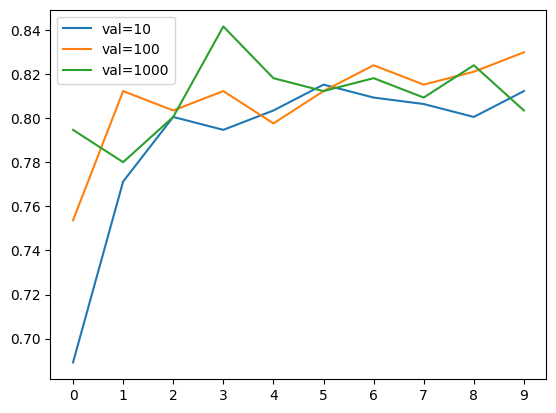

In [49]:
for size, hist in scores.items():
    plt.plot(hist["val_accuracy"], label=("val=%s" % size))

plt.xticks(np.arange(10))
plt.legend()

## 8. Regularization and dropout 
- Regularizing by freezing the part of the network
- Adding dropout to our model
- Experimenting with different values

In [50]:
# Function to define model by adding new dense layer and dropout
def make_model(learning_rate=0.01, size_inner=100, droprate=0.5):
    base_model = Xception(weights='imagenet',
                          include_top=False,
                          input_shape=(150,150,3))

    base_model.trainable = False
    
    #########################################
    
    inputs = keras.Input(shape=(150,150,3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner) # add dropout layer
    outputs = keras.layers.Dense(10)(drop)
    model = keras.Model(inputs, outputs)
    
    #########################################
    
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    # Compile the model
    model.compile(optimizer=optimizer,
                  loss=loss,
                  metrics=['accuracy'])
    
    return model


# Create checkpoint to save best model for version 3
filepath = './xception_v3_{epoch:02d}_{val_accuracy:.3f}.h5'
checkpoint = keras.callbacks.ModelCheckpoint(filepath=filepath,
                                             save_best_only=True,
                                             monitor='val_accuracy',
                                             mode='max')

# Set the best values of learning rate and inner layer size based on previous experiments
learning_rate = 0.001
size = 1000

# Dict to store results
scores = {}

# List of dropout rates
droprates = [0.0, 0.2, 0.5, 0.8]

for droprate in droprates:
    print(droprate)
    
    model = make_model(learning_rate=learning_rate,
                       size_inner=size,
                       droprate=droprate)
    
    # Train for longer (epochs=30) cause of dropout regularization
    history = model.fit(train_ds, epochs=30, validation_data=val_ds, callbacks=[checkpoint])
    scores[droprate] = history.history
    
    print()
    print()

0.0
Epoch 1/30
95/96 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.5968 - loss: 1.2803

96/96 ━━━━━━━━━━━━━━━━━━━━ 16s 101ms/step - accuracy: 0.6799 - loss: 0.9456 - val_accuracy: 0.7742 - val_loss: 0.6160
Epoch 2/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.8364 - loss: 0.4509 - val_accuracy: 0.7595 - val_loss: 0.7389
Epoch 3/30
95/96 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9077 - loss: 0.2684

96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9091 - loss: 0.2663 - val_accuracy: 0.8299 - val_loss: 0.5636
Epoch 4/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.9540 - loss: 0.1499 - val_accuracy: 0.7977 - val_loss: 0.6426
Epoch 5/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.9775 - loss: 0.1007 - val_accuracy: 0.8035 - val_loss: 0.5962
Epoch 6/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.9909 - loss: 0.0469 - val_accuracy: 0.8094 - val_loss: 0.6789
Epoch 7/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.9974 - loss: 0.0288 - val_accuracy: 0.8240 - val_loss: 0.6780
Epoch 8/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.9974 - loss: 0.0203 - val_accuracy: 0.8035 - val_loss: 0.7016
Epoch 9/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.9993 - loss: 0.0099 - val_accuracy: 0.8065 - val_loss: 0.7447
Epoch 10/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.9990 - loss: 0.0089 - val_accuracy: 0.8270 - val_loss: 0

96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.9987 - loss: 0.0100 - val_accuracy: 0.8387 - val_loss: 0.6947
Epoch 14/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.9997 - loss: 0.0049 - val_accuracy: 0.8358 - val_loss: 0.7352
Epoch 15/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.9997 - loss: 0.0058 - val_accuracy: 0.8358 - val_loss: 0.7378
Epoch 16/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.9990 - loss: 0.0052 - val_accuracy: 0.8211 - val_loss: 0.8085
Epoch 17/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.9987 - loss: 0.0100 - val_accuracy: 0.8211 - val_loss: 0.7715
Epoch 18/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - accuracy: 0.9831 - loss: 0.0576 - val_accuracy: 0.7419 - val_loss: 1.3834
Epoch 19/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.8999 - loss: 0.3285 - val_accuracy: 0.7859 - val_loss: 0.8593
Epoch 20/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.9560 - loss: 0.1303 - val_accuracy: 0.7977 - val_l

2025-12-09 05:08:37.770803: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_4132', 12 bytes spill stores, 12 bytes spill loads



96/96 ━━━━━━━━━━━━━━━━━━━━ 16s 109ms/step - accuracy: 0.6855 - loss: 0.9631 - val_accuracy: 0.7478 - val_loss: 0.6552
Epoch 2/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.8272 - loss: 0.4769 - val_accuracy: 0.7595 - val_loss: 0.6664
Epoch 3/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.8807 - loss: 0.3414 - val_accuracy: 0.8035 - val_loss: 0.5847
Epoch 4/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - accuracy: 0.9309 - loss: 0.2063 - val_accuracy: 0.8065 - val_loss: 0.7006
Epoch 5/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.9316 - loss: 0.1830 - val_accuracy: 0.8182 - val_loss: 0.5929
Epoch 6/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.9687 - loss: 0.1041 - val_accuracy: 0.8006 - val_loss: 0.6653
Epoch 7/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.9883 - loss: 0.0589 - val_accuracy: 0.8152 - val_loss: 0.7268
Epoch 8/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.9941 - loss: 0.0330 - val_accuracy: 0.8065 - val_loss: 

96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.9051 - loss: 0.2595 - val_accuracy: 0.8446 - val_loss: 0.5753
Epoch 7/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.9270 - loss: 0.2164 - val_accuracy: 0.8065 - val_loss: 0.5913
Epoch 8/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.9459 - loss: 0.1672 - val_accuracy: 0.8270 - val_loss: 0.5892
Epoch 9/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.9501 - loss: 0.1384 - val_accuracy: 0.8240 - val_loss: 0.6113
Epoch 10/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.9576 - loss: 0.1144 - val_accuracy: 0.7977 - val_loss: 0.7750
Epoch 11/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.9602 - loss: 0.1163 - val_accuracy: 0.7918 - val_loss: 0.6574
Epoch 12/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - accuracy: 0.9638 - loss: 0.1021 - val_accuracy: 0.7977 - val_loss: 0.6962
Epoch 13/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.9707 - loss: 0.0804 - val_accuracy: 0.8094 - val_loss

96/96 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - accuracy: 0.9791 - loss: 0.0669 - val_accuracy: 0.8475 - val_loss: 0.7800
Epoch 24/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.9827 - loss: 0.0484 - val_accuracy: 0.8446 - val_loss: 0.7336
Epoch 25/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.9870 - loss: 0.0449 - val_accuracy: 0.8240 - val_loss: 0.7940
Epoch 26/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.9853 - loss: 0.0407 - val_accuracy: 0.8094 - val_loss: 0.8448
Epoch 27/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.9811 - loss: 0.0554 - val_accuracy: 0.8123 - val_loss: 0.8661
Epoch 28/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.9765 - loss: 0.0644 - val_accuracy: 0.7947 - val_loss: 0.9552
Epoch 29/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.9756 - loss: 0.0811 - val_accuracy: 0.8152 - val_loss: 0.9327
Epoch 30/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.9762 - loss: 0.0718 - val_accuracy: 0.8152 - val_l

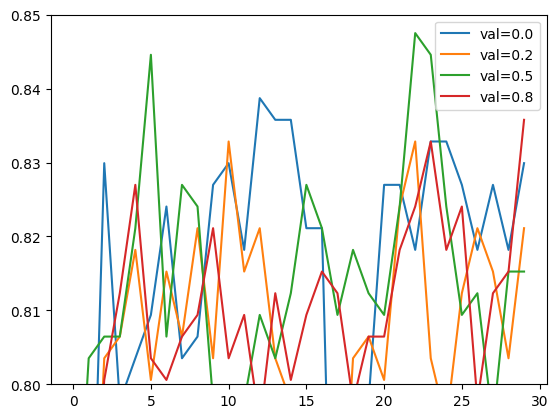

In [51]:
for droprate, hist in scores.items():
    plt.plot(hist["val_accuracy"], label=("val=%s" % droprate))

plt.ylim(0.80, 0.85)
plt.legend()

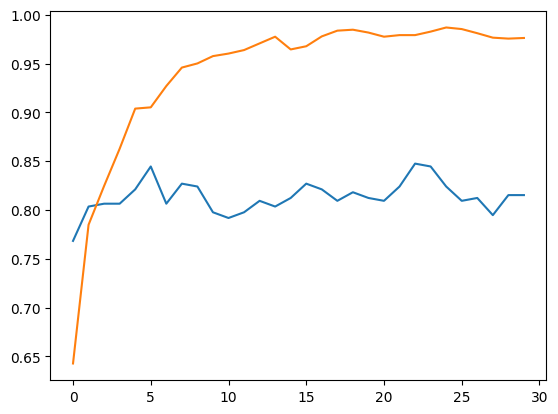

In [55]:
hist = scores[0.5]
plt.plot(hist["val_accuracy"], label=("val=%s" % droprate))
plt.plot(hist["accuracy"], label=("val=%s" % droprate))

## 9. Data Augmentation
- Different data augmentation
- Training model with augmentation

In [53]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=10,
    zoom_range=0.1,
    vertical_flip=True)

train_ds = train_gen.flow_from_directory(
    directory="./clothing-dataset-small/train",
    target_size=(150,150),
    batch_size=32)

val_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,)

val_ds = val_gen.flow_from_directory(
    directory="./clothing-dataset-small/validation",
    target_size=(150,150),
    batch_size=32,
    shuffle=False)



Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [57]:
learning_rate = 0.001
size = 1000
droprate = 0.5

model = make_model(
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate)
    
history = model.fit(train_ds, epochs=50, validation_data=val_ds,)

Epoch 1/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 18s 146ms/step - accuracy: 0.5717 - loss: 1.3356 - val_accuracy: 0.7185 - val_loss: 0.7966
Epoch 2/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 96ms/step - accuracy: 0.6783 - loss: 0.9348 - val_accuracy: 0.7889 - val_loss: 0.6313
Epoch 3/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 80ms/step - accuracy: 0.7275 - loss: 0.8012 - val_accuracy: 0.7742 - val_loss: 0.6315
Epoch 4/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 83ms/step - accuracy: 0.7419 - loss: 0.7387 - val_accuracy: 0.7830 - val_loss: 0.6498
Epoch 5/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 77ms/step - accuracy: 0.7608 - loss: 0.6767 - val_accuracy: 0.7625 - val_loss: 0.6485
Epoch 6/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 98ms/step - accuracy: 0.7774 - loss: 0.6396 - val_accuracy: 0.7947 - val_loss: 0.6070
Epoch 7/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 83ms/step - accuracy: 0.7992 - loss: 0.5870 - val_accuracy: 0.7889 - val_loss: 0.6123
Epoch 8/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 81ms/step - accuracy: 0.8005 - loss: 0.5575 - val_accuracy: 0.7918 -

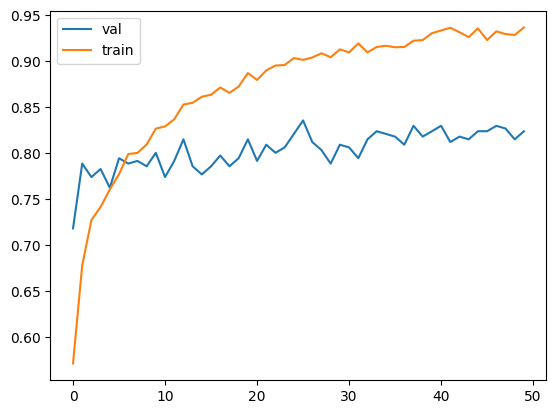

In [58]:
hist = history.history
plt.plot(hist["val_accuracy"], label=("val"))
plt.plot(hist["accuracy"], label=("train"))

plt.legend()

## 10. Training a lerge model 
- Train a 299x299 model

In [65]:
def make_model(input_size=150,learning_rate=0.01, size_inner=100, droprate=0.5):
    base_model = Xception(weights='imagenet',
                          include_top=False,
                          input_shape=(input_size,input_size,3))

    base_model.trainable = False
    
    #########################################
    
    inputs = keras.Input(shape=(input_size,input_size,3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    inner = keras.layers.Dense(size_inner, activation='relu')(vectors) # activation function 'relu'
    outputs = keras.layers.Dense(10)(inner)
    model = keras.Model(inputs, outputs)
    
    #########################################
    
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    # Compile the model
    model.compile(optimizer=optimizer,
                  loss=loss,
                  metrics=['accuracy'])
    
    return model

In [66]:
input_size = 299

train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=10,
    zoom_range=0.1,
    horizontal_flip=True)

train_ds = train_gen.flow_from_directory(
    directory="./clothing-dataset-small/train",
    target_size=(input_size,input_size),
    batch_size=32)

val_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,)

val_ds = val_gen.flow_from_directory(
    directory="./clothing-dataset-small/validation",
    target_size=(input_size,input_size),
    batch_size=32,
    shuffle=False)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [70]:
filepath = './xception_v5_{epoch:02d}_{val_accuracy:.3f}.h5'
checkpoint = keras.callbacks.ModelCheckpoint(filepath=filepath,
                                             save_best_only=True,
                                             monitor='val_accuracy',
                                             mode='max')

In [71]:
learning_rate = 0.0005
size = 1000
droprate = 0.5
input_size = 299

model = make_model(
    input_size=input_size,
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate)
    
history = model.fit(train_ds, epochs=30, validation_data=val_ds, callbacks=[checkpoint])

Epoch 1/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step - accuracy: 0.6836 - loss: 0.9740

96/96 ━━━━━━━━━━━━━━━━━━━━ 48s 414ms/step - accuracy: 0.7757 - loss: 0.6665 - val_accuracy: 0.8622 - val_loss: 0.3962
Epoch 2/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 25s 252ms/step - accuracy: 0.8745 - loss: 0.3619 - val_accuracy: 0.8504 - val_loss: 0.4116
Epoch 3/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 23s 239ms/step - accuracy: 0.8931 - loss: 0.2906 - val_accuracy: 0.8416 - val_loss: 0.4228
Epoch 4/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 24s 252ms/step - accuracy: 0.9003 - loss: 0.2690 - val_accuracy: 0.8328 - val_loss: 0.4299
Epoch 5/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step - accuracy: 0.9307 - loss: 0.1966

96/96 ━━━━━━━━━━━━━━━━━━━━ 24s 253ms/step - accuracy: 0.9273 - loss: 0.2070 - val_accuracy: 0.8915 - val_loss: 0.3509
Epoch 6/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 24s 249ms/step - accuracy: 0.9358 - loss: 0.1783 - val_accuracy: 0.8768 - val_loss: 0.3709
Epoch 7/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 23s 238ms/step - accuracy: 0.9478 - loss: 0.1595 - val_accuracy: 0.8739 - val_loss: 0.3812
Epoch 8/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 24s 252ms/step - accuracy: 0.9492 - loss: 0.1490 - val_accuracy: 0.8651 - val_loss: 0.4006
Epoch 9/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 24s 250ms/step - accuracy: 0.9534 - loss: 0.1298 - val_accuracy: 0.8622 - val_loss: 0.4269
Epoch 10/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 23s 237ms/step - accuracy: 0.9645 - loss: 0.1151 - val_accuracy: 0.8768 - val_loss: 0.4069
Epoch 11/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 24s 253ms/step - accuracy: 0.9671 - loss: 0.1063 - val_accuracy: 0.8739 - val_loss: 0.4435
Epoch 12/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 25s 256ms/step - accuracy: 0.9681 - loss: 0.1025 - val_accuracy: 0.

96/96 ━━━━━━━━━━━━━━━━━━━━ 24s 253ms/step - accuracy: 0.9700 - loss: 0.0851 - val_accuracy: 0.8944 - val_loss: 0.4131
Epoch 16/30
51/96 ━━━━━━━━━━━━━━━━━━━━ 10s 229ms/step - accuracy: 0.9738 - loss: 0.0792

KeyboardInterrupt: 

## 11. Using the model
- Loading the model
- Evaluating the model
- Getting predictions

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.applications.xception import preprocess_input


In [2]:
model = keras.models.load_model("xception_v5_15_0.894.h5") # best model path

I0000 00:00:1765240522.134740   55330 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5563 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9


In [3]:
test_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,)

test_ds = test_gen.flow_from_directory(
    directory="./clothing-dataset-small/test",
    target_size=(299,299),
    batch_size=32,
    shuffle=False)

Found 372 images belonging to 10 classes.


In [78]:
model.evaluate(test_ds)

11/12 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - accuracy: 0.8315 - loss: 0.4594

2025-12-09 06:00:22.638302: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1093', 4 bytes spill stores, 4 bytes spill loads

2025-12-09 06:00:22.653011: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1093', 8 bytes spill stores, 8 bytes spill loads

2025-12-09 06:00:22.826383: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1086', 48 bytes spill stores, 48 bytes spill loads

2025-12-09 06:00:22.990928: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1093', 68 bytes spill stores, 68 bytes spill loads

2025-12-09 06:00:23.001596: I external/local

12/12 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - accuracy: 0.8817 - loss: 0.3373 
12/12 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - accuracy: 0.8817 - loss: 0.3373


[0.3373018503189087, 0.8817204236984253]

In [ ]:
path = "./clothing-dataset-small/test/shorts/9ebafad8-4684-4283-8c17-5a9a0114a707.jpg"
img = , target_size=(299, 299))

In [6]:
import numpy as np

In [7]:
x = np.array(img)
X = np.array([x])
X.shape

(1, 299, 299, 3)

In [8]:
X = preprocess_input(X)

In [10]:

pred = model.predict(X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


In [11]:
classes = ['dress',
    'hat',
    'longsleeve',
    'outwear',
    'pants',
    'shirt',
    'shoes',
    'shorts',
    'skirt',
    't-shirt']

dict(zip(classes, pred[0]))

{'dress': np.float32(-2.3887205),
 'hat': np.float32(-8.372581),
 'longsleeve': np.float32(-6.962728),
 'outwear': np.float32(-2.0848992),
 'pants': np.float32(5.737768),
 'shirt': np.float32(-6.3383703),
 'shoes': np.float32(-6.910225),
 'shorts': np.float32(15.67374),
 'skirt': np.float32(-0.657918),
 't-shirt': np.float32(-7.440029)}

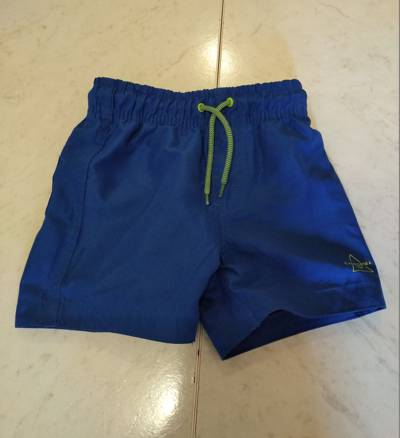

In [12]:
load_img(path)
# indeed shorts